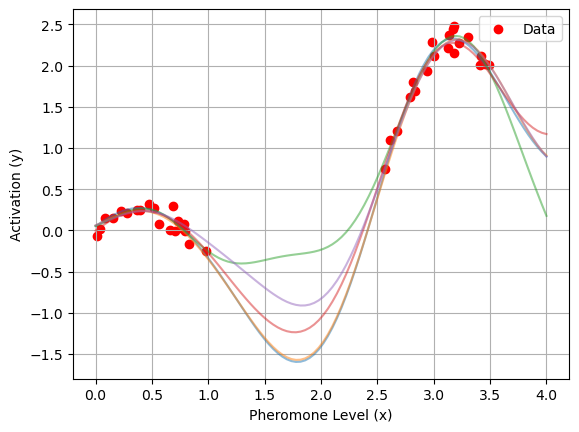

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Load data (from part (b))
data = pd.read_csv('pheronome_csv.csv', header=None)
X = data[0].values.reshape(-1, 1)
y = data[1].values

# Fit GP
kernel = 1.0**2 * RBF(length_scale=0.5)
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.01)
gp.fit(X, y)

# Generate samples
x_pred = np.linspace(0, 4, 100).reshape(-1, 1)
y_pred, cov = gp.predict(x_pred, return_cov=True)
samples = np.random.multivariate_normal(y_pred, cov, 5)
plt.plot(x_pred, samples.T, alpha=0.5)
plt.scatter(X, y, c='red', label='Data')
plt.xlabel('Pheromone Level (x)')
plt.ylabel('Activation (y)')
plt.legend()
plt.grid(True)
plt.savefig('gp_samples.png')
plt.show()
